# Part II - Communicate Data: Ford GoBike System Data
## by (Derbew Felasman)


## Investigation Overview
This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis which is as Capstone project part of the Udacity Data Analysis Nanodegree course and the data set I selected for this project is fordgobike_tripdata.csv. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
   - The first part will be , Exploratory data visualization, I will use Python visualization libraries to systematically explore fordgobike_tripdata.csv dataset, starting from plots of single variables and building up to plots of multiple variables. 
   - The second part will be, Explanatory data visualization, I will produce a short presentation that illustrates interesting properties, trends, and relationships that I discovered in my fordgobike_tripdata.csv dataset. The primary method of conveying my findings will be through transforming my exploratory visualizations from the first part into polished, explanatory visualizations.


## Dataset Overview

> After cleaning the dataset it has 174952 rows and 20 columns (duration_sec, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_birth_year, member_gender, start_date, start_hourofday, start_dayofweek, start_month, end_date, end_hourofday, end_dayofweek, end_month, and age ). The data type of the variables are 2 category, 2 datetime, 6 numerical, and 10 of them are object.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
gobike_df_clean = pd.read_csv('gobike_df_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1) The most top ten start stations
> Market St at 10th St and Berry St at 4th St were the most common start stations.

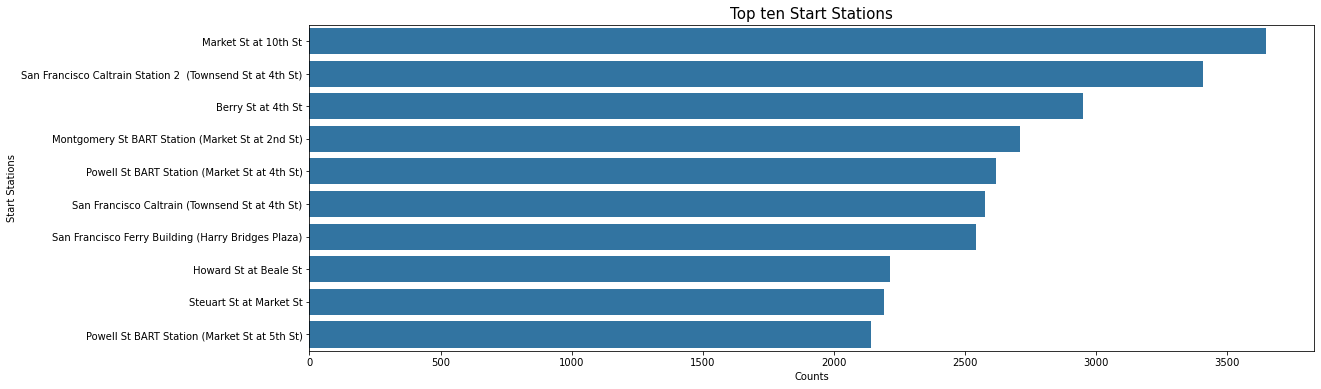

In [15]:
plt.figure(figsize=[18,6])
base_color = sns.color_palette()[0]
orders = gobike_df_clean['start_station_name'].value_counts().index[:10]
sns.countplot(data = gobike_df_clean, y = 'start_station_name', color = base_color, order = orders);
plt.title("Top ten Start Stations", fontsize = 15)
plt.xlabel("Counts")
plt.ylabel("Start Stations");

## (Visualization 2) User type distributions
The majority of the user type are Subscribers almost 90.53% and Customer are only 9.47%.

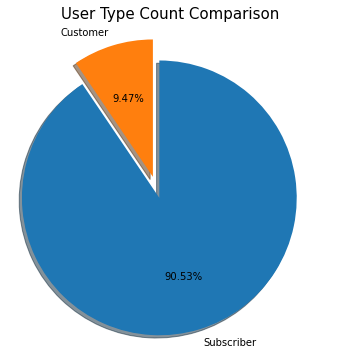

In [6]:
plt.figure(figsize=(10,6))
explode = (0.16, 0)
user_counts = gobike_df_clean['user_type'].value_counts()
plt.pie(user_counts, labels = user_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%', explode = explode, shadow=True);
plt.title('User Type Count Comparison', fontsize=15);
plt.axis('square');

## (Visualization 3) Member gender distributions

> 74.59% members are male and 23.32% are female

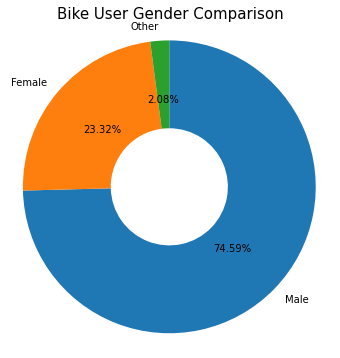

In [7]:
plt.figure(figsize=(10,6))
gender_counts = gobike_df_clean['member_gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%', wedgeprops = {'width' : 0.6});
plt.title('Bike User Gender Comparison', fontsize=15);
plt.axis('square');

## (Visualization 4) Relationship between duration_sec and day of week
> Tuesday to Friday are higher durations than other days.


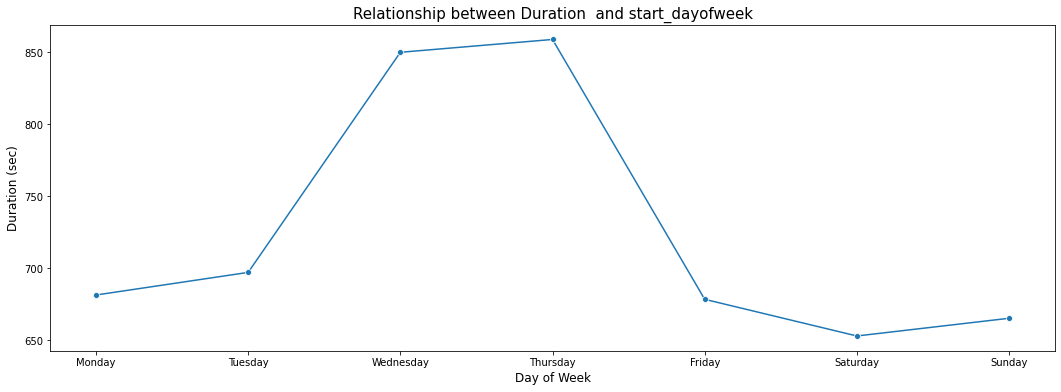

In [11]:
week_avg = gobike_df_clean.groupby('start_dayofweek').duration_sec.mean()
plt.figure(figsize=[18,6])
orders = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.lineplot(x = week_avg.index, y = week_avg, marker='o')
plt.xticks(np.arange(0,7), orders)
plt.title('Relationship between Duration  and start_dayofweek', fontsize = 15)
plt.xlabel('Day of Week', fontsize = 12);
plt.ylabel('Duration (sec)', fontsize = 12);

## (Visualization 5) Relationship between User type and day of week
> Subscribers mostly used bikes on weekdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a slight increment on Thursday and Friday.

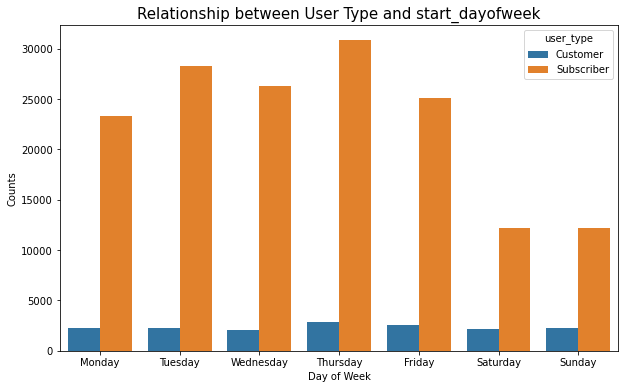

In [12]:
plt.figure(figsize=[10,6])

sns.countplot(data = gobike_df_clean, x = 'start_dayofweek', hue = 'user_type', order = orders)
plt.title('Relationship between User Type and start_dayofweek', fontsize = 15)
plt.xlabel('Day of Week');
plt.ylabel('Counts');

## (Visualization 6) Duration in weekdays between Member Gender
> There is a higher duration on Friday and Saterday by the members that have other gender. Next a members who are a female has relatively higher duration on Friday and Saterday. 

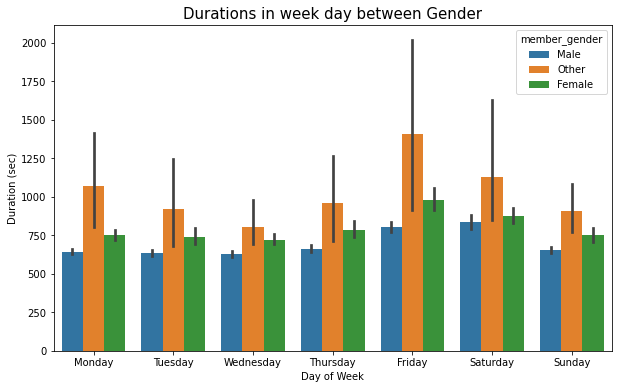

In [13]:
plt.figure(figsize=[10,6])
sns.barplot(data = gobike_df_clean, x='start_dayofweek', y='duration_sec', hue='member_gender')
plt.xticks(np.arange(0,7), orders)
plt.title("Durations in week day between Gender", fontsize=15)
plt.xlabel("Day of Week")
plt.ylabel('Duration (sec)');